In [1]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline
np.random.seed(42)

In [4]:
# only need to run once
pseq.io.download_example_data()

In [2]:
data = pseq.io.read_cellranger("/Users/jason/Documents/data/fly-rnaseq/sample-3")

In [2]:
data = pseq.io.load_example()

data_brain = pseq.io.load_example("brain")
data_vnc = pseq.io.load_example("vnc")

data = pseq.concat(data_brain, data_vnc)

data

Nep3  tRNA:Pro-CGG-1-1  CG9570  Or19b  CG15322  Or19a  karr  \
sample cell                                                                
0      0        0                 0       0      0        0      0     0   
       1        0                 0       0      0        0      0     0   
       2        0                 0       0      0        0      0     0   
       3        0                 0       0      0        0      0     0   
       4        0                 0       0      0        0      0     0   
       5        0                 0       0      0        0      0     0   
       6        0                 0       0      0        0      0     0   
       7        0                 0       0      0        0      0     0   
       8        0                 0       0      0        0      0     0   
       9        0                 0       0      0        0      0     0   
       10       1                 0       0      0        0      0     0   
       11       0                 0       0      0        0      0     0   
       12       0                 0       0      0        0      0     0   
       13       0                 0       0      0        0      0     0   
       14       0                 0       0      0        0      0     0   
       15       0                 0       0      0        0      0     0   
       16       0                 0       0      0        0      0     0   
       17       0                 0       0      0        0      0     0   
       18       0                 0       0      0        0      0     0   
       19       0                 0       0      0        0      0     0   
       20       0                 0       0      0        0      0     0   
       21       0                 0       0      0        0      0     0   
       22       0                 0       0      0        0      0     0   
       23       0                 0       0      0        0      0     0   
       24       0                 0       0      0        0      0     0   
       25       0                 0       0      0        0      0     0   
       26       0                 0       0      0        0      0     0   
       27       0                 0       0      0        0      0     0   
       28       0                 0       0      0        0      0     0   
       29       0                 0       0      0        0      0     0   
...           ...               ...     ...    ...      ...    ...   ...   
1      470      0                 0       0      0        0      0     0   
       471      0                 0       0      0        0      0     0   
       472      0                 0       0      0        0      0     0   
       473      0                 0       0      0        0      0     0   
       474      0                 0       0      0        0      0     0   
       475      0                 0       0      0        0      0     0   
       476      0                 0       0      0        0      0     0   
       477      0                 0       0      0        0      0     0   
       478      0                 0       0      0        0      0     0   
       479      0                 0       0      0        0      0     0   
       480      0                 0       0      0        0      0     0   
       481      0                 0       0      0        0      0     0   
       482      0                 0       0      0        0      0     0   
       483      0                 0       0      0        0      0     0   
       484      0                 0       0      0        0      0     0   
       485      0                 0       0      0        0      0     0   
       486      0                 0       0      0        0      0     0   
       487      0                 0       0      0        0      0     0   
       488      0                 0       0      0        0      0     0   
       489      0                 0       0      0        0  

In [3]:
dropped = data.drop_cells(umis=1).drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(9058, 17492)
(9058, 11633)


,min,max,mean,median
umis,0,2638,0,0
umis above 0,1,2638,2,1
umis per cell cell,743,14707,1463,1178
genes expressed,263,3025,736,662
umis per gene,1,757904,1139,159
cells expressing,0,9058,175,3


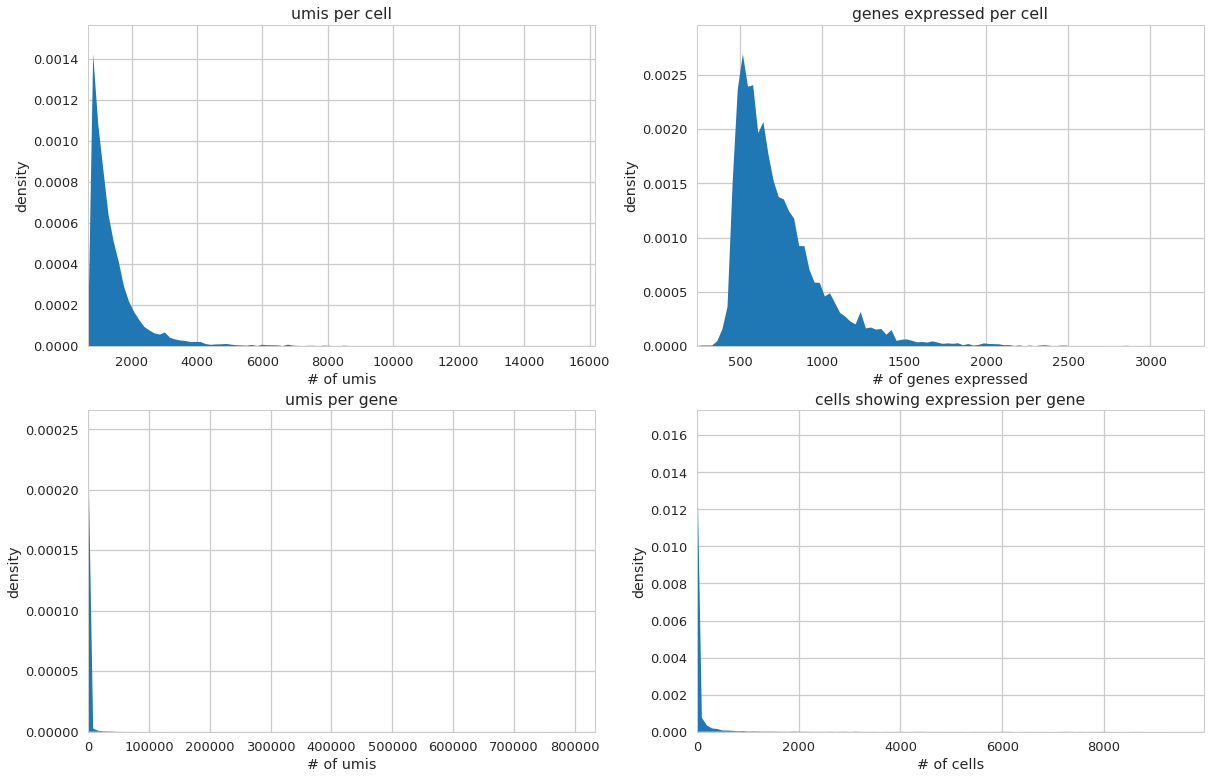

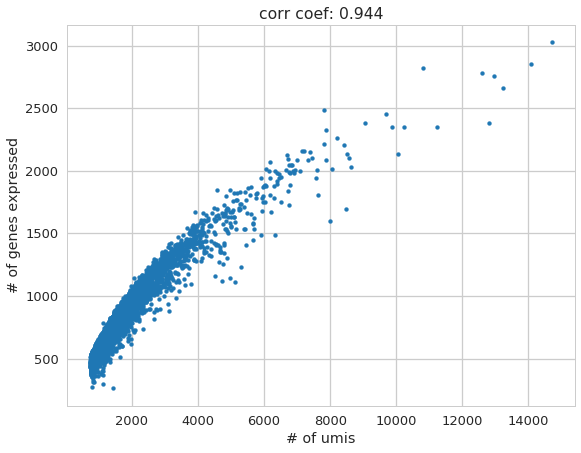

In [4]:
stats = pseq.summary.summarize(dropped)
stats

In [4]:
normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total)
regressed.head()

,Nep3,CG12655,CG33217,Vps11,RpL10,G9a,cin,CG3777,CG12470,y,...,Plap,CG5080,Tfb4,Iris,Pino,CG4629,S,EGFP,tdTomato,GAL4
cell,,,,,,,,,,,,,,,,,,,,,
0,-0.302168,-0.027613,-0.423143,-0.373702,0.698331,-0.536622,-0.195421,-0.047810,-0.027936,-0.204371,...,-0.274901,-0.196671,6.618168,-0.013902,-0.246735,-0.265626,-0.549930,-0.248042,-0.276584,-0.117698
1,-0.163942,-0.017214,-0.183809,-0.163957,0.563796,-0.272702,-0.110436,0.003935,-0.003328,-0.051847,...,-0.096359,-0.145852,-0.071916,-0.005318,-0.090407,-0.140231,-0.215161,-0.067351,-0.072890,-0.076828
2,-0.236517,-0.022674,-0.309470,-0.274082,-0.535477,-0.411272,-0.155057,-0.023233,-0.016248,-0.131929,...,-0.190102,-0.172534,-0.139683,-0.009825,-0.172486,-0.206069,2.197689,-0.162222,-0.179838,-0.098287
3,-0.157226,-0.016708,-0.172180,-0.153765,-0.782552,-0.259878,6.045203,0.006449,-0.002132,-0.044435,...,-0.087684,-0.143382,-0.065645,-0.004901,-0.082811,-0.134138,-0.198895,-0.058572,-0.062992,-0.074842
4,-0.174692,-0.018023,-0.202423,-0.180269,0.486696,-0.293228,-0.117046,-0.000089,-0.005242,-0.063709,...,-0.110245,-0.149804,-0.081955,-0.005985,-0.102565,-0.149984,-0.241198,-0.081404,-0.088732,-0.080007


,pc-0,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,pc-11,pc-12,pc-13,pc-14
cell,,,,,,,,,,,,,,,
0,-10.626005,0.721652,4.422889,-1.453398,1.801531,-4.253700,2.279276,-4.434734,1.917718,-1.629512,-0.595252,0.342314,-3.243238,-1.062413,1.300228
1,2.984943,-1.822897,-0.513083,1.262944,-0.692031,0.169154,0.163673,3.381124,0.321390,0.195584,-0.763169,-0.937256,-0.521311,0.309060,0.412166
2,-2.736719,1.913430,3.702314,-0.552053,-0.027824,-0.897552,-0.267576,-1.539113,0.943291,-0.444086,-0.576071,-2.025847,-0.201023,-0.359421,-0.098976
3,2.596386,-3.386596,-0.946245,1.207177,-1.194362,0.611890,-0.725740,2.418343,0.477749,1.219357,-0.221202,-0.463409,-1.115307,-0.374139,0.507837
4,-0.609268,-4.773563,-2.048001,-0.620508,0.234545,0.182870,-0.289926,0.308408,-0.204985,-0.063239,0.214730,1.260141,0.687903,-0.378075,0.022651


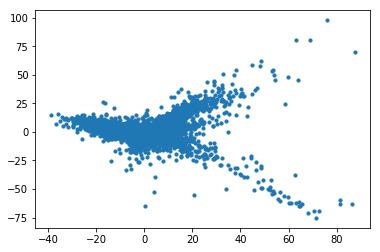

In [5]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [6]:
clusters = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: {}".format(len(np.unique(clusters))))

# go back and attach the results to the data
normed.clusters = clusters
reduced.clusters = clusters
normed.head()

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.6646468639373779 seconds
Jaccard graph constructed in 10.696745157241821 seconds
Wrote graph to binary file in 3.3616678714752197 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.806234
After 2 runs, maximum modularity is Q = 0.807345
After 4 runs, maximum modularity is Q = 0.80892
Louvain completed 24 runs in 9.204569101333618 seconds
PhenoGraph complete in 24.30493998527527 seconds
# of clusters: 14


,,Nep3,CG12655,CG33217,Vps11,RpL10,G9a,cin,CG3777,CG12470,y,...,Plap,CG5080,Tfb4,Iris,Pino,CG4629,S,EGFP,tdTomato,GAL4
cell,cluster,,,,,,,,,,,,,,,,,,,,,
0,2,0.0,0.0,0.0,0.0,1.945910,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,1.386294,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,11,0.0,0.0,0.0,0.0,1.098612,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,1.386294,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [7]:
%%timeit -n 1 -r 1
tsne = pseq.dim.multicore_tsne(reduced, perplexity=30.0, n_jobs=8, verbose=1)

{'perplexity': 30.0, 'n_jobs': 8, 'verbose': 1}
31.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [27]:
tsne = pseq.dim.multicore_tsne(reduced, perplexity=30.0, n_jobs=1)
tsne.head()

{'perplexity': 30.0, 'n_jobs': 1}


,,tsne-0,tsne-1
cell,cluster,,
0,2,6.633663,-17.881564
1,0,-2.670890,10.653550
2,3,19.470993,1.257319
3,0,-12.818402,8.197660
4,0,-12.557893,-10.270774


In [32]:
tsne = pseq.dim.tsne(reduced, perplexity=30.0, verbose=True)
tsne.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9058 samples in 0.007s...
[t-SNE] Computed neighbors for 9058 samples in 1.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9058
[t-SNE] Computed conditional probabilities for sample 2000 / 9058
[t-SNE] Computed conditional probabilities for sample 3000 / 9058
[t-SNE] Computed conditional probabilities for sample 4000 / 9058
[t-SNE] Computed conditional probabilities for sample 5000 / 9058
[t-SNE] Computed conditional probabilities for sample 6000 / 9058
[t-SNE] Computed conditional probabilities for sample 7000 / 9058
[t-SNE] Computed conditional probabilities for sample 8000 / 9058
[t-SNE] Computed conditional probabilities for sample 9000 / 9058
[t-SNE] Computed conditional probabilities for sample 9058 / 9058
[t-SNE] Mean sigma: 1.575009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.935936
[t-SNE] Error after 1000 iterations: 1.863285


,,tsne-0,tsne-1
cell,cluster,,
0,2,49.734810,-3.033724
1,0,-23.266638,2.113292
2,3,17.028717,27.254721
3,0,-28.258150,-14.529531
4,0,2.199722,-27.936943


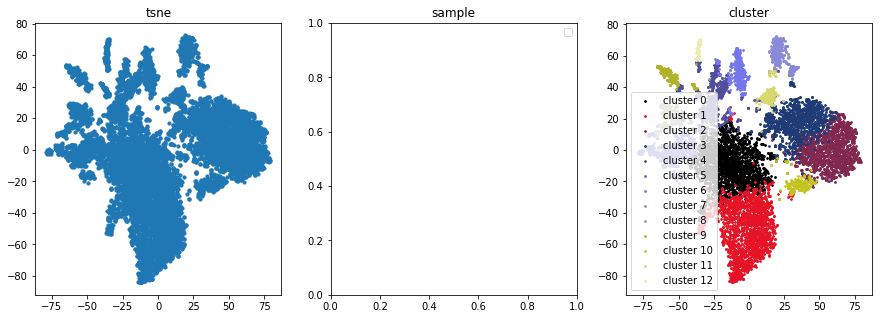

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pseq.viz.scatter(tsne, s=10)
plt.title('tsne')

plt.subplot(1, 3, 2)
pseq.viz.scatter(tsne, color_by="sample", s=10)
plt.title('sample')
plt.legend(["brain", "vnc"], scatterpoints=1)

plt.subplot(1, 3, 3)
pseq.viz.scatter(tsne, color_by="cluster", s=3)
plt.title('cluster')
plt.legend()

plt.show()

In [13]:
top_genes = pseq.upregulated(normed, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]finding genes for cluster 5
[LibLinear]finding genes for cluster 6
[LibLinear]

---

['MRE16', 'CR40469', 'pAbp']
['14-3-3zeta', 'Sap47', 'Galphao']
['noe', 'Vha44', 'ATPsynB']
['Hex-A', 'Cam', 'Rdl']
['Antp', 'hdc', 'l(3)neo38']
['Obp44a', 'CAH1', 'ImpL3']


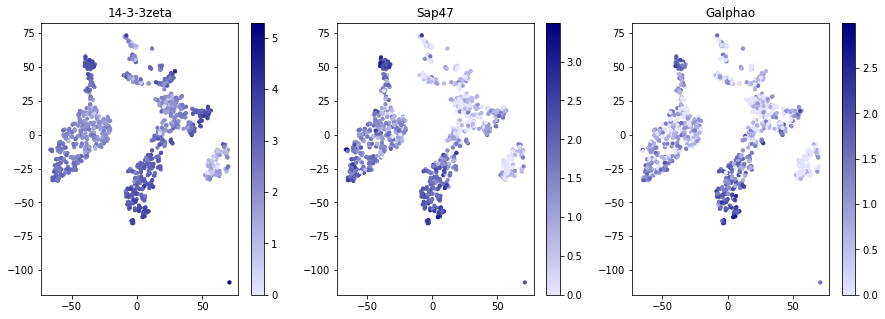

In [26]:
plt.figure(figsize=(15, 5))

import seaborn as sns
cmap = sns.light_palette('navy', as_cmap=True)

# look at expression profile for top genes from cluster 4
genes = top_genes[1]
for i, gene in enumerate(genes):
    plt.subplot(1, len(genes), i+1)
    pseq.viz.scatter(tsne, color_by=normed[gene], cmap=cmap, s=10)
    plt.title(gene)
    plt.colorbar()

plt.show()

/Users/jason/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


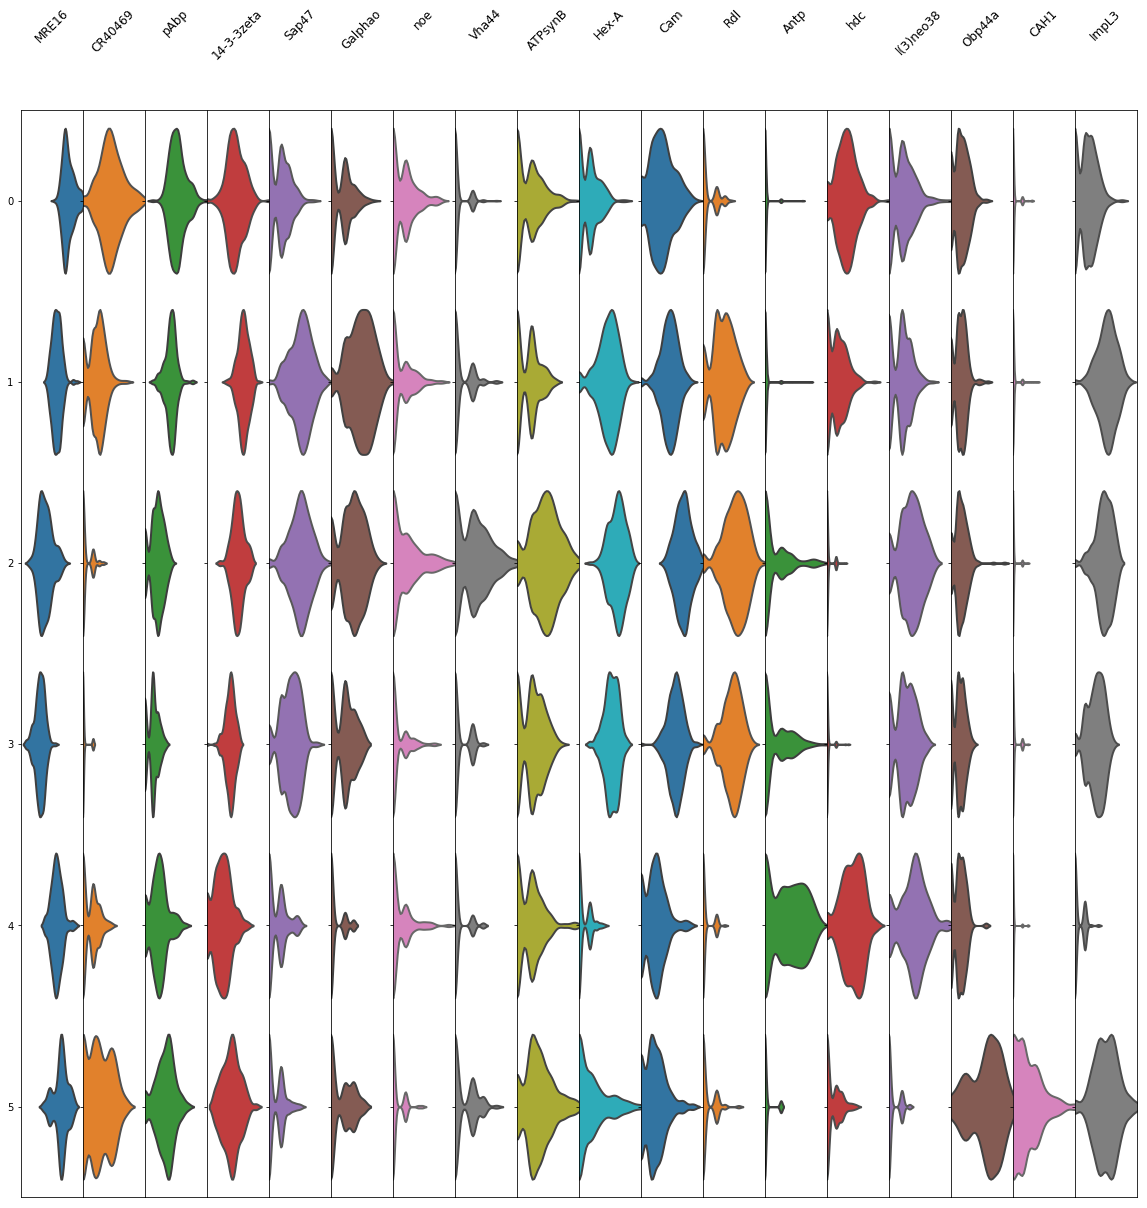

In [17]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, group_by='cluster', cluster_genes=False)